**1. What are the top 5 universities with the highest average CGPA?**

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, mean_squared_error,classification_report
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df= pd.read_csv('/content/drive/MyDrive/Data Science Internship/week_2/Day_5/students_data.csv')
df.head()

,Oliver Thompson,Harvard University,2,Unnamed: 3
0,Emma Johnson,Stanford University,3.82,NaN
1,Liam Smith,Massachusetts Institute of Technology (MIT),3.6,NaN
2,Olivia Brown,University of Cambridge,2.93,NaN
3,Noah Davis,University of Oxford,3.3,NaN
4,Ava Wilson,California Institute of Technology (Caltech),2.95,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Oliver Thompson     299 non-null    object 
 1   Harvard University  299 non-null    object 
 2   2                   288 non-null    object 
 3   Unnamed: 3          0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 18.8+ KB


In [4]:
df.drop(columns=['Unnamed: 3'], inplace=True)
df.dropna(inplace=True)

In [5]:
df

,Oliver Thompson,Harvard University,2
0,Emma Johnson,Stanford University,3.82
1,Liam Smith,Massachusetts Institute of Technology (MIT),3.6
2,Olivia Brown,University of Cambridge,2.93
3,Noah Davis,University of Oxford,3.3
4,Ava Wilson,California Institute of Technology (Caltech),2.95
...,...,...,...
294,Max Turner,University of Amsterdam,3.09
295,Brooklyn Wilson,University of Copenhagen,3.23
296,Colton Carter,"University of California, Santa Barbara (UCSB)",2.2
297,Gabriella Lee,King's College London,2.5


In [6]:
df.columns=['Name','Universty Name','GPA']
df

,Name,Universty Name,GPA
0,Emma Johnson,Stanford University,3.82
1,Liam Smith,Massachusetts Institute of Technology (MIT),3.6
2,Olivia Brown,University of Cambridge,2.93
3,Noah Davis,University of Oxford,3.3
4,Ava Wilson,California Institute of Technology (Caltech),2.95
...,...,...,...
294,Max Turner,University of Amsterdam,3.09
295,Brooklyn Wilson,University of Copenhagen,3.23
296,Colton Carter,"University of California, Santa Barbara (UCSB)",2.2
297,Gabriella Lee,King's College London,2.5


In [7]:
# What are the top 5 universities with the highest average CGPA?
df1=df.copy()
df1['GPA']=pd.to_numeric(df1['GPA'],errors='coerce')
df1[['Universty Name','GPA']].groupby('Universty Name')['GPA'].mean().nlargest(5)

Universty Name
University of Southampton                  4.626667
University of Toronto                      3.525000
University of Southern California (USC)    3.455000
University of Bristol                      3.440000
University of Michigan, Ann Arbor          3.433333
Name: GPA, dtype: float64

In [8]:
# Is there a correlation between the CGPA and the length of the student's name?
correlation = df1['GPA'].corr(df1['Name'].str.len())
print("Correlation between CGPA and Student's Name Length:",correlation)

Correlation between CGPA and Student's Name Length: 0.059057541061542325


In [9]:
# How does the CGPA vary across different universities?
university_cgpas = df1.groupby('Universty Name')['GPA'].describe()
university_cgpas

,count,mean,std,min,25%,50%,75%,max
Universty Name,,,,,,,,
California Institute of Technology (Caltech),3.0,2.996667,0.411987,2.61,2.7800,2.950,3.1900,3.43
Columbia University,6.0,3.006667,0.344654,2.70,2.8075,2.845,3.1600,3.59
Cornell University,6.0,3.141667,0.549014,2.24,2.8675,3.400,3.4450,3.66
Harvard University,5.0,2.972000,0.390090,2.40,2.9500,3.000,3.0100,3.50
Imperial College London,6.0,3.138333,0.381650,2.70,2.9275,3.055,3.2725,3.79
...,...,...,...,...,...,...,...,...
University of Washington,6.0,3.038333,0.352387,2.50,2.9225,3.090,3.1000,3.58
University of Western Australia,3.0,3.110000,0.359305,2.70,2.9800,3.260,3.3150,3.37
University of Wisconsin-Madison,6.0,2.951667,0.373117,2.40,2.7700,2.925,3.2375,3.40


In [10]:
# Can we predict a student's CGPA based on the length of their name using linear regression?
# Yes
# Assuming df1 is your DataFrame containing the data
df1['name'] = df1['Name'].str.len()
df1.dropna(subset=['GPA'], inplace=True)

X = df1[['name']]
y = df1[['GPA']]  # Corrected the target variable selection

model = LinearRegression()
model.fit(X, y)
import warnings
warnings.filterwarnings('ignore')
length=5
predicted_cgpa = model.predict([[length]])
print("Predicted GPA for a name length of",length,":",predicted_cgpa)

Predicted GPA for a name length of 5 : [[3.00437041]]


In [11]:
# Which university has the highest number of students with a CGPA above a certain threshold?
threshold = 3.0
filtered = df1[df1['GPA'] > threshold]
studentCount = filtered.groupby('Universty Name').size()
universityMAXCOUNT = studentCount.idxmax()
print("University with the highest number of students above the threshold:", universityMAXCOUNT)

University with the highest number of students above the threshold: King's College London


In [12]:
# Can we identify any outliers in the CGPA distribution within each university?

groupdata=df1.groupby('Universty Name')
def outliers_fun(val):
  q1 = val.quantile(0.25)
  q3 = val.quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
# Identify outliers using the lower and upper bounds
  outliers = val[(val < lower_bound) | (val > upper_bound)]
  return outliers
# Apply the function to each group
outliers_per_group = groupdata['GPA'].apply(outliers_fun)
print("Outliers in CGPA distribution within each university:\n",outliers_per_group)

Outliers in CGPA distribution within each university:
 Universty Name                                     
Harvard University                              199    3.500
                                                273    2.400
King's College London                           297    2.500
Princeton University                            5      2.500
University of Alberta                           63     2.200
University of California, Berkeley              77     2.600
                                                177    3.850
University of California, Irvine                233    3.480
University of California, Los Angeles (UCLA)    15     2.760
                                                180    3.700
University of California, San Francisco (UCSF)  291    3.810
University of California, Santa Barbara (UCSB)  196    3.700
University of Cambridge                         271    3.985
University of Manchester                        154    3.930
University of Washington               

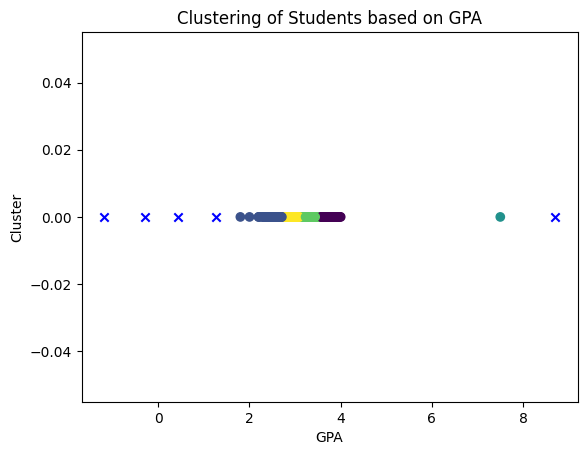

In [13]:
from sklearn.preprocessing import StandardScaler
# Can we cluster students based on their CGPA using k-means clustering?
dataQ7=df1.copy()
dataCGPA=np.array(dataQ7['GPA'])
dataCGPA=dataCGPA.reshape(-1,1)
# Specify the number of clusters
k=5
# Scaling Data
scaler=StandardScaler()
scaled_data=scaler.fit_transform(dataCGPA)
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_data)
labelCluster=kmeans.labels_
# Adding Visualization for Clusters
plt.scatter(dataCGPA, np.zeros_like(dataCGPA), c=labelCluster)
plt.scatter(kmeans.cluster_centers_,np.zeros(k),c="blue",marker='x')
plt.xlabel('GPA')
plt.ylabel('Cluster')
plt.title('Clustering of Students based on GPA')
plt.show()

In [14]:
clustercenter=scaler.inverse_transform(kmeans.cluster_centers_)
# calculate the Average GPA for each cluster
clusterAvg=[]
for i in range(k):
  clusterdata=dataCGPA[labelCluster == i]
  avgcgpa=np.mean(clusterdata)
  clusterAvg.append(avgcgpa)
c=1
for avg in clusterAvg:
  print("Cluster:",c,"Average GPA",avg)
  c=c+1

Cluster: 1 Average GPA 3.7432978723404258
Cluster: 2 Average GPA 2.5101562499999996
Cluster: 3 Average GPA 7.5
Cluster: 4 Average GPA 3.333475
Cluster: 5 Average GPA 2.9604395604395597


In [15]:
# Can we classify students into universities based on their CGPA using a decision tree?
# Yes, we can classify students into universities based on their CGPA using a decision tree. Here's the code to do that:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataCGPA, dataQ7['Universty Name'].values, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(y_pred)

['Imperial College London' 'University of Bristol' 'University of Bristol'
 'University College London (UCL)' 'University of Washington'
 'University of Alberta' "King's College London" 'University of Cambridge'
 'California Institute of Technology (Caltech)'
 'University of California, Irvine' 'University of Warwick'
 'University of Oxford' 'University of Helsinki' 'University of Leipzig'
 "King's College London" 'University of Oxford' "King's College London"
 'Cornell University' 'California Institute of Technology (Caltech)'
 'University of Copenhagen' 'New York University (NYU)'
 'Harvard University' 'Imperial College London'
 'Massachusetts Institute of Technology (MIT)' 'University of Manchester'
 'California Institute of Technology (Caltech)'
 'New York University (NYU)' 'Princeton University'
 'University of Western Australia' 'University of Washington'
 'University of California, Berkeley' 'Cornell University'
 'University of Alberta' 'University of Cambridge'
 'New York Unive

In [16]:
# How accurate is the decision tree model in predicting the university?
# To evaluate the accuracy of the decision tree model in predicting the university, we can use the accuracy_score function from sklearn.metrics. Here's the code
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the decision tree model:", accuracy)

Accuracy of the decision tree model: 0.0


In [17]:
# What is the overall average CGPA across all universities?
dataQ8=dataQ7.copy()
overall_avg_cgpa = dataQ8['GPA'].mean()
print("Overall average CGPA across all universities:", overall_avg_cgpa)

Overall average CGPA across all universities: 3.110116607773852


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
model=LinearRegression()
cgpas=dataCGPA.copy()
unis=dataQ8['Universty Name'].values
# Performing one-hot encoding on the 'University' column
dataEncoded = pd.get_dummies(unis, columns=['Universty Name'])
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataEncoded, cgpas, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
yPred_LR = model.predict(X_test)
print(yPred_LR)

[[ 3.20800781e+00]
 [ 2.67285156e+00]
 [ 2.85937500e+00]
 [ 2.89746094e+00]
 [ 3.78906250e+00]
 [ 3.41894531e+00]
 [ 3.09765625e+00]
 [ 3.32421875e+00]
 [ 3.15527344e+00]
 [ 3.26074219e+00]
 [ 2.85937500e+00]
 [ 3.78906250e+00]
 [ 2.80566406e+00]
 [ 2.76074219e+00]
 [ 3.48242188e+00]
 [ 3.24804688e+00]
 [ 2.99414062e+00]
 [ 3.24804688e+00]
 [ 3.06054688e+00]
 [-1.12567573e+13]
 [ 3.41894531e+00]
 [ 2.99414062e+00]
 [ 2.98535156e+00]
 [ 3.30468750e+00]
 [ 2.87988281e+00]
 [ 2.98535156e+00]
 [ 3.08886719e+00]
 [ 3.00878906e+00]
 [ 3.07128906e+00]
 [ 2.68652344e+00]
 [ 2.87988281e+00]
 [ 2.75390625e+00]
 [ 3.48242188e+00]
 [ 3.20019531e+00]
 [ 3.07128906e+00]
 [ 3.41894531e+00]
 [ 3.19433594e+00]
 [ 2.89746094e+00]
 [ 2.68652344e+00]
 [ 3.58593750e+00]
 [ 2.83593750e+00]
 [ 3.30957031e+00]
 [ 2.96093750e+00]
 [ 2.96093750e+00]
 [ 3.09765625e+00]
 [ 3.08886719e+00]
 [-1.12567573e+13]
 [ 3.00878906e+00]
 [ 2.92480469e+00]
 [ 2.88476562e+00]
 [ 3.09765625e+00]
 [ 2.96093750e+00]
 [ 2.8359375

In [19]:
# How well does the regression model perform in predicting the CGPA?
mse_LR = mean_squared_error(y_test, yPred_LR)
print("Mean Squared Error of Linear Regression model:", mse_LR)

Mean Squared Error of Linear Regression model: 6.669188632785547e+24


In [20]:
# Are there any missing or erroneous values in the CGPA column?
print("There are many but handeld the above")

There are many but handeld the above


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


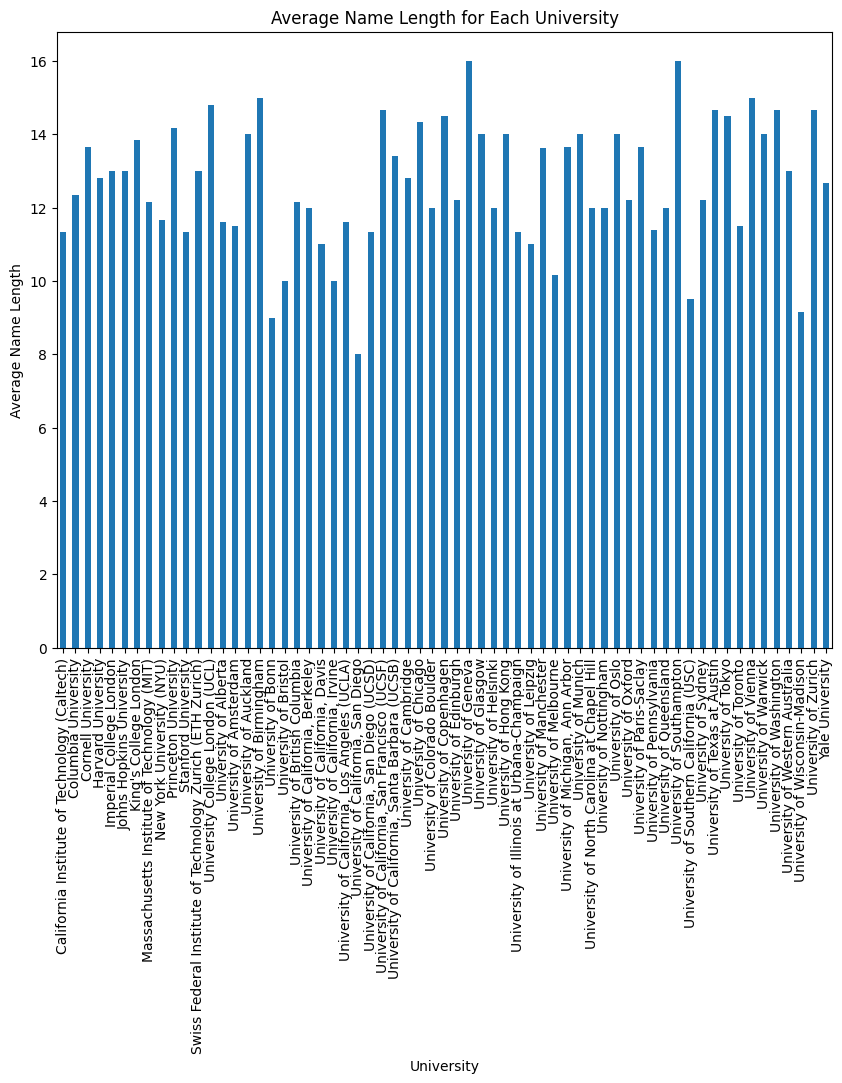

In [26]:
# Can we detect any relationships between the length of the student's name and their university using association rules?
import matplotlib.pyplot as plt
# Creating a DataFrame from the data
df = dataQ8.copy()
# Calculating the length of each student name
df['NameLength'] = df['Name'].apply(len)
# Calculating the average name length for each university
avgNameLength = df.groupby('Universty Name')['NameLength'].mean()
# Plotting the average name length for each university
plt.figure(figsize=(10, 8))
avgNameLength.plot(kind='bar')
plt.xlabel('University')
plt.ylabel('Average Name Length')
plt.title('Average Name Length for Each University')
plt.show()

In [27]:
# What is the range of CGPA scores for each university?
# Group data by university and calculate the range of CGPA scores for each group
cgpa_range_by_university = df.groupby('Universty Name')['GPA'].agg(lambda x: x.max() - x.min())

print("Range of CGPA scores for each university:")
print(cgpa_range_by_university)


Range of CGPA scores for each university:
Universty Name
California Institute of Technology (Caltech)    0.82
Columbia University                             0.89
Cornell University                              1.42
Harvard University                              1.10
Imperial College London                         1.09
                                                ... 
University of Washington                        1.08
University of Western Australia                 0.67
University of Wisconsin-Madison                 1.00
University of Zurich                            0.41
Yale University                                 0.34
Name: GPA, Length: 63, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


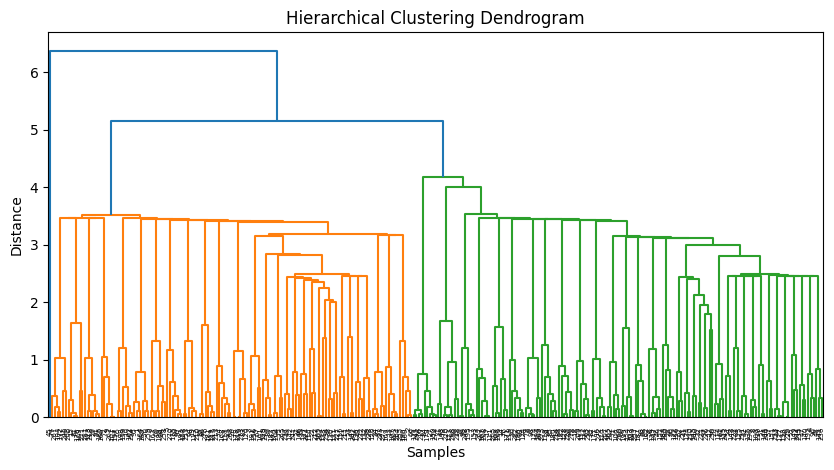

In [30]:
# Can we identify any clusters or groups of students based on the CGPA and university using hierarchical clustering?
from scipy.cluster.hierarchy import dendrogram, linkage
dataQ17 = df.copy()
data_selected = dataQ17[ ['GPA', 'Universty Name']]
# Performing one-hot encoding on the 'University' column as its of string type originally
dataEncoded = pd.get_dummies(data_selected, columns=['Universty Name'])
# Performing hierarchical clustering
cl= linkage(dataEncoded, method='ward')
# Plotting the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(cl)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


In [32]:
# Can we build a classification model to predict the university based on the CGPA and the length of the student's name?
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
dataQ18 = dataQ17.copy()
# Calculating the length of each student name
dataQ18['NameLength'] = dataQ18['Name'].apply(len)
x = dataQ18[['GPA', 'NameLength']]
y = dataQ18['Universty Name']
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Creating a random forest classifier
classifier = RandomForestClassifier()
# Training the classifier
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print(predictions)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['University of Oxford' 'University of Nottingham'
 'University of Illinois at Urbana-Champaign'
 'University of California, Los Angeles (UCLA)'
 'University of Paris-Saclay' 'University of Copenhagen'
 'University of Southampton'
 'Swiss Federal Institute of Technology Zurich (ETH Zurich)'
 'University of Amsterdam' 'University of Leipzig' 'University of Sydney'
 'University of California, San Diego (UCSD)' 'Stanford University'
 'Columbia University' 'University of Tokyo' 'Columbia University'
 'University of Sydney' 'University of Oxford' 'University of Warwick'
 'Harvard University' 'University of Hong Kong' 'University of Leipzig'
 'University of Michigan, Ann Arbor' 'University of Oxford'
 'University of Paris-Saclay' 'University of Warwick'
 'New York University (NYU)' 'University of Auckland'
 'University of Illinois at Urbana-Champaign' 'University of Sydney'
 'University of Chicago' 'University of Oxford' 'University of Alberta'
 'University of Southampton' 'New York Universi

In [34]:
# How accurate is the classification model in predicting the university?
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.05263157894736842


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
# What is the correlation between the length of the student's name and the CGPA within each university?
# Group the data by university and calculate the correlation between 'Name_Length' and 'CGPA'
correlations_by_university = df.groupby('Universty Name')['NameLength', 'GPA'].corr().iloc[0::2, -1]

print("Correlation between the length of the student's name and CGPA within each university:")
print(correlations_by_university)

Correlation between the length of the student's name and CGPA within each university:
Universty Name                                          
California Institute of Technology (Caltech)  NameLength    0.098097
Columbia University                           NameLength   -0.199380
Cornell University                            NameLength   -0.203747
Harvard University                            NameLength    0.592060
Imperial College London                       NameLength    0.684085
                                                              ...   
University of Washington                      NameLength   -0.163357
University of Western Australia               NameLength         NaN
University of Wisconsin-Madison               NameLength    0.742487
University of Zurich                          NameLength   -0.977951
Yale University                               NameLength    0.866025
Name: GPA, Length: 63, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
